In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
print('jahyeok was here')

jahyeok was here


In [8]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('fraudTrain.csv', index_col=0)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

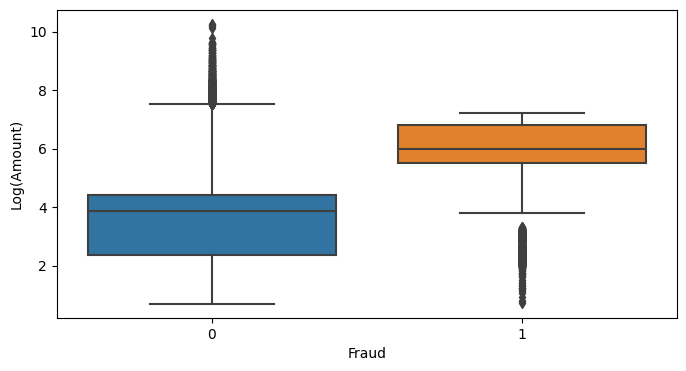

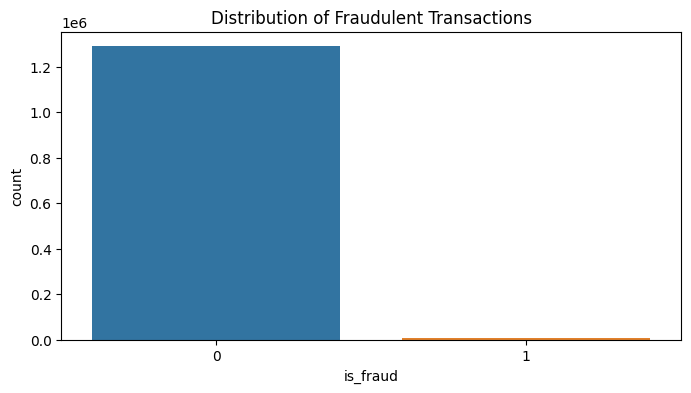

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [38]:
np.log(df.amt).hist()
plt.title('Log of amt')
plt.show()
 
log_amt = df[['amt', 'is_fraud']].copy()
log_amt['log_amt'] = np.log(log_amt['amt'] + 1)

plt.figure(figsize=(8, 4))
sns.boxplot(x='is_fraud', y='log_amt', data=log_amt)
plt.xlabel('Fraud')
plt.ylabel('Log(Amount)')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='is_fraud', data=log_amt)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

log_amt['is_fraud'].value_counts()

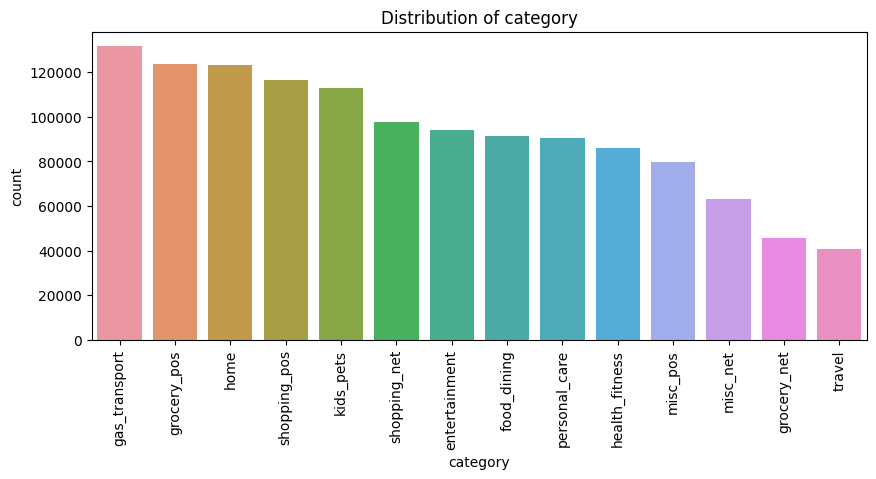

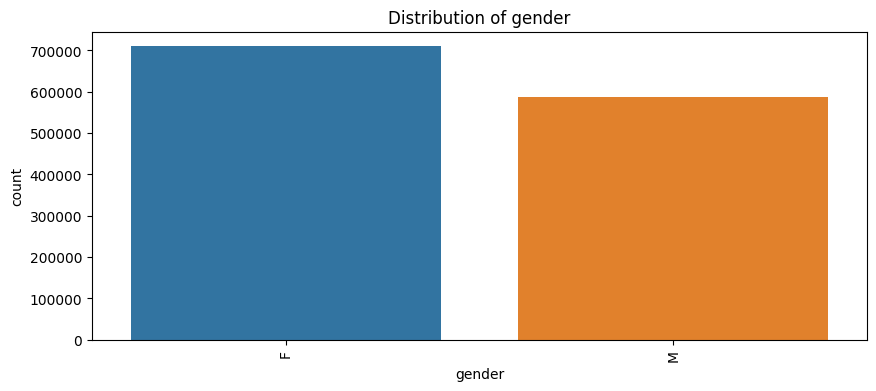

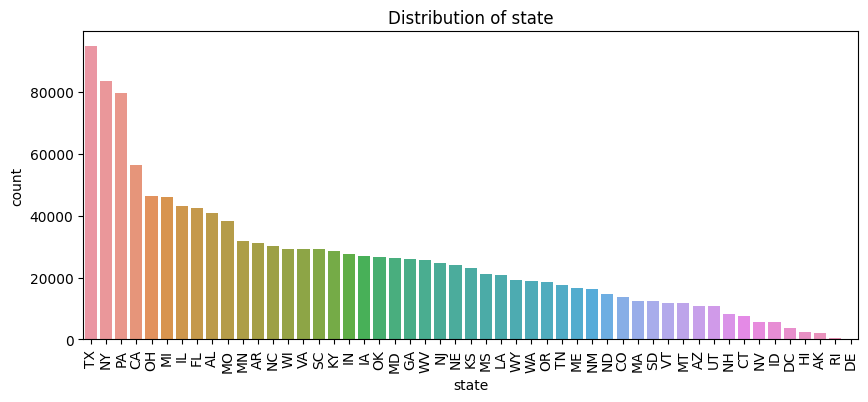

In [37]:
categorical_cols = ['category', 'gender', 'state']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


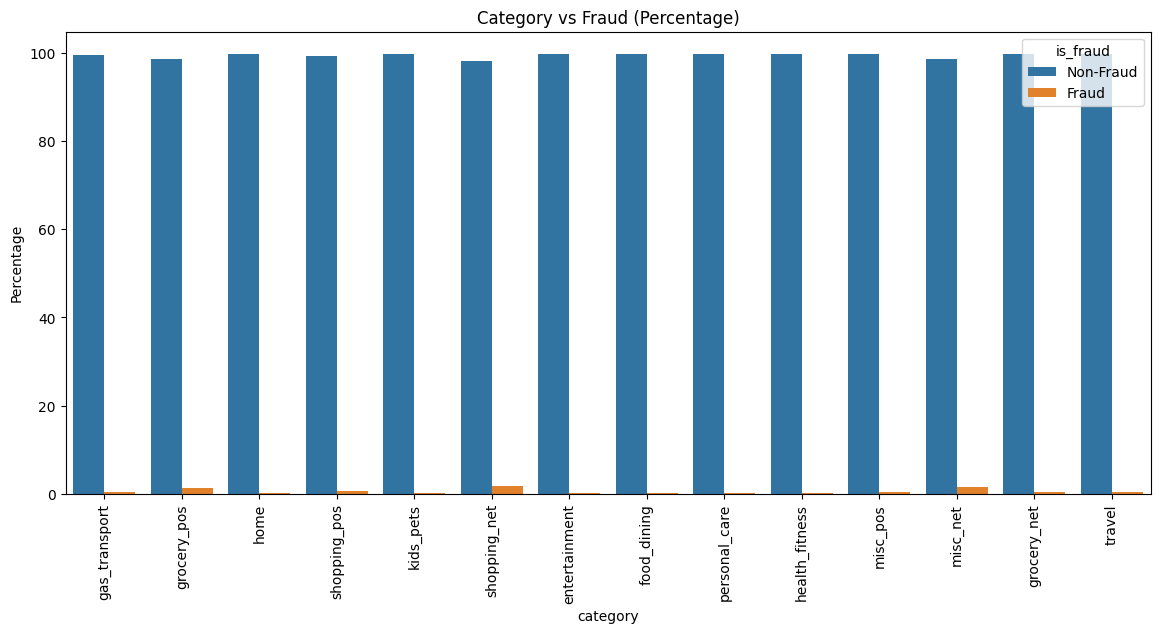

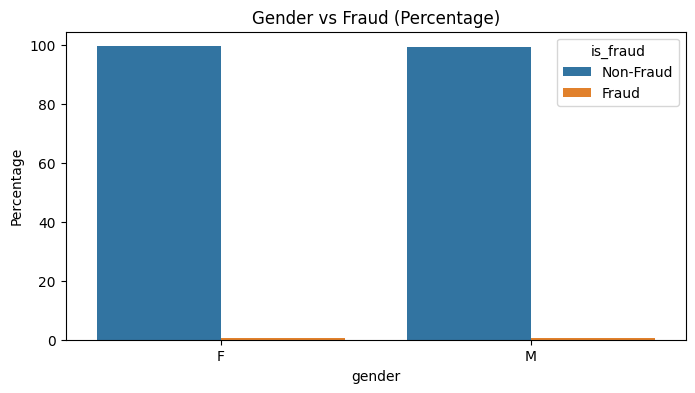

In [39]:
category_counts = df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentages = category_percentages.reset_index()
category_percentages_melted = category_percentages.melt(id_vars='category', value_vars=[0, 1], var_name='is_fraud', value_name='percentage')
category_percentages_melted['is_fraud'] = category_percentages_melted['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

plt.figure(figsize=(14, 6))
sns.barplot(x='category', y='percentage', hue='is_fraud', data=category_percentages_melted, order=df['category'].value_counts().index)
plt.title('Category vs Fraud (Percentage)')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

gender_counts = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_percentages = gender_percentages.reset_index()
gender_percentages_melted = gender_percentages.melt(id_vars='gender', value_vars=[0, 1], var_name='is_fraud', value_name='percentage')
gender_percentages_melted['is_fraud'] = gender_percentages_melted['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

plt.figure(figsize=(8, 4))
sns.barplot(x='gender', y='percentage', hue='is_fraud', data=gender_percentages_melted)
plt.title('Gender vs Fraud (Percentage)')
plt.ylabel('Percentage')
plt.show()

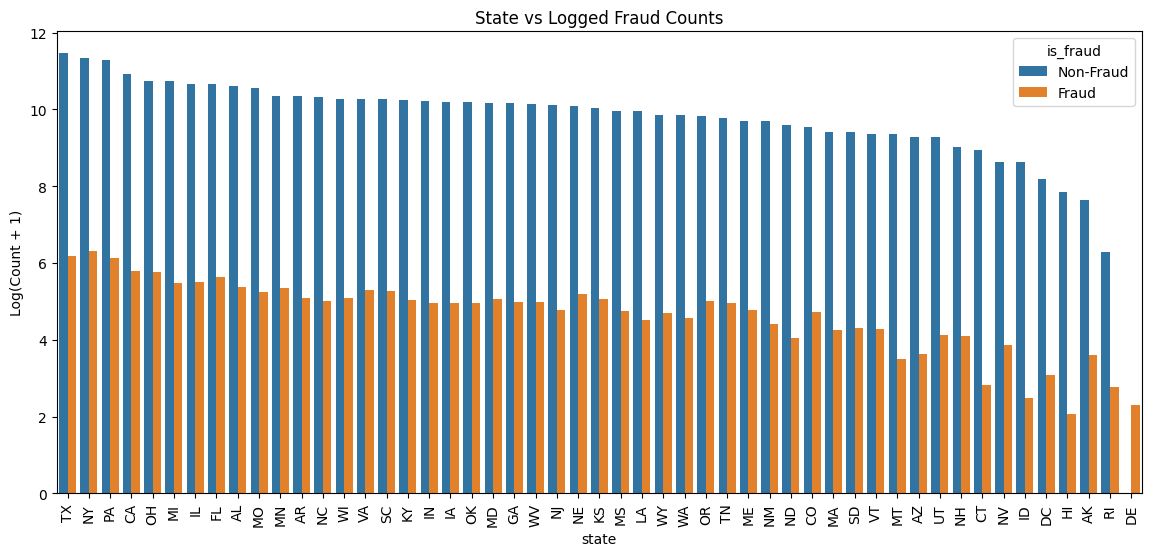

In [23]:
import numpy as np

state_fraud_counts = df.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)
state_fraud_counts_log = np.log1p(state_fraud_counts)
state_fraud_counts_log = state_fraud_counts_log.reset_index()
state_fraud_counts_log_melted = state_fraud_counts_log.melt(id_vars='state', value_vars=[0, 1], var_name='is_fraud', value_name='log_count')
state_fraud_counts_log_melted['is_fraud'] = state_fraud_counts_log_melted['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

plt.figure(figsize=(14, 6))
sns.barplot(x='state', y='log_count', hue='is_fraud', data=state_fraud_counts_log_melted, order=df['state'].value_counts().index)
plt.title('State vs Logged Fraud Counts')
plt.xticks(rotation=90)
plt.ylabel('Log(Count + 1)')
plt.show()

In [6]:
first_11 = df.columns[:11]
df = df[first_11]
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA


In [9]:
df['transaction_dt'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('trans_date_trans_time', axis=1)
df.head(1)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,transaction_dt
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,2019-01-01 00:00:18


In [18]:
df.merchant.value_counts().index.str.startswith('fraud_').sum()

386

In [19]:
df['merchant'] = df['merchant'].str.replace('fraud_', '')
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,transaction_dt
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,2019-01-01 00:00:18
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,2019-01-01 00:00:44
2,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,2019-01-01 00:00:51
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,2019-01-01 00:01:16
4,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,2019-01-01 00:03:06


In [20]:
df.category.value_counts()

gas_transport     243
grocery_pos       226
misc_pos          106
misc_net           92
shopping_net       83
shopping_pos       80
grocery_net        79
entertainment      37
food_dining        19
home               12
kids_pets           8
health_fitness      6
travel              5
personal_care       4
Name: category, dtype: int64